<a href="https://colab.research.google.com/github/team-ben-okri/mtn-churn-prediction/blob/main/mtn_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MTN Churn Prediction

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/fr/thumb/e/e9/Mtn-logo-svg.svg/623px-Mtn-logo-svg.svg.png?20220727031824"
       alt="mtn logo" width="1000"/>
</p>

### 📌 Introduction

In the telecom sector, customer churn is a pressing concern, particularly in highly competitive markets like Nigeria. By studying patterns in customer demographics, satisfaction, and usage, companies can better anticipate churn and strengthen retention strategies.

### 🎯 Problem Statement

The goal of this project is to explore MTN Nigeria’s customer data to uncover insights into churn behavior, identify influencing factors, and build predictive models that can flag customers likely to leave.

### 📊 Dataset

This dataset captures synthetic records of MTN Nigeria customers in Q1 2025, covering age, gender, state, tenure, subscription plans, device types, satisfaction scores, usage behavior, revenue, and churn reasons. It contains 974 entries and is suitable for EDA, churn prediction, and customer segmentation.

Link to dataset: [Link](https://www.kaggle.com/datasets/oluwademiladeadeniyi/mtn-nigeria-customer-churn)

### 🎯 Objectives

- Perform Exploratory Data Analysis (EDA) to understand customer usage and churn patterns.
- Build and evaluate machine learning models to predict churn.
- Identify the key drivers of churn for actionable business insights.
- **_Segment customers to support targeted retention strategies._**

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
data_url = "https://raw.githubusercontent.com/team-ben-okri/" \
           "mtn-churn-prediction/refs/heads/main/data/" \
           "mtn_customer_churn.csv"
churn_df = pd.read_csv(data_url)
churn_df.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


## Exploratory Data Analysis (EDA)

Print data summary.

In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

In [5]:
churn_df.shape

(974, 17)

Check missing values.

In [4]:
churn_df.isnull().sum()

,0
Customer ID,0
Full Name,0
Date of Purchase,0
Age,0
State,0
MTN Device,0
Gender,0
Satisfaction Rate,0
Customer Review,0
Customer Tenure in months,0


No missing values for all feature and target variables, except for `Reasons for Churn`. This is alright because only customers who have churned have a reason for churn.

Check for duplicates

In [9]:
churn_df.duplicated().sum()

np.int64(0)

Print summary statistics

In [3]:
churn_df.describe(include="all")

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
count,974,974,974,974.000000,974,974,974,974.000000,974,974.000000,974,974.000000,974.000000,9.740000e+02,974.000000,974,284
unique,496,484,3,NaN,35,4,2,NaN,5,NaN,21,NaN,NaN,NaN,NaN,2,7
top,CUST0003,Halima Walker,Feb-25,NaN,Osun,Mobile SIM Card,Female,NaN,Very Good,NaN,60GB Monthly Broadband Plan,NaN,NaN,NaN,NaN,No,High Call Tarriffs
freq,3,5,450,NaN,43,301,495,NaN,212,NaN,81,NaN,NaN,NaN,NaN,690,54
mean,NaN,NaN,NaN,48.043121,NaN,NaN,NaN,2.947639,NaN,31.422998,NaN,19196.663244,10.564682,2.046696e+05,99.304764,NaN,NaN
std,NaN,NaN,NaN,17.764307,NaN,NaN,NaN,1.384219,NaN,17.191256,NaN,25586.726985,5.709427,3.247855e+05,57.739511,NaN,NaN
min,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,350.000000,1.000000,3.500000e+02,0.820000,NaN,NaN
25%,NaN,NaN,NaN,32.000000,NaN,NaN,NaN,2.000000,NaN,17.000000,NaN,5500.000000,5.000000,3.300000e+04,47.637500,NaN,NaN
50%,NaN,NaN,NaN,49.000000,NaN,NaN,NaN,3.000000,NaN,31.000000,NaN,14500.000000,11.000000,1.080000e+05,103.330000,NaN,NaN
75%,NaN,NaN,NaN,63.750000,NaN,NaN,NaN,4.000000,NaN,47.000000,NaN,24000.000000,15.000000,2.610000e+05,149.697500,NaN,NaN


Check for customers with more than one device

In [14]:
device_counts = (
    churn_df
    .groupby('Customer ID')
    .size().rename('Num_of_devices')
    .reset_index()
)

device_counts['Num_of_devices'].value_counts().sort_index()

,count
Num_of_devices,
1,169
2,176
3,151


In the dataset, `Customer ID` can appear multiple times because some customers own more than one MTN device (SIM card, MiFi, router, etc.). This makes the dataset **customer-level** and **device-level** rather than strictly one-row-per-customer.

For this reason, we will keep two portions of the dataset for analysis and modeling:
- Device level - **`device_df`**
- Customer level - **`customer_df`** (proposed for modeling customer churn)

In [8]:
# Device-level dataframe (no changes, just the raw dataset)
device_df = churn_df.copy()

# Customer-level aggregation
customer_df = (
    churn_df
    .groupby("Customer ID")
    .agg({
        "Full Name": "first",
        "Date of Purchase": "max",
        "Age": "first",
        "Gender": "first",
        "State": "first",
        "Customer Tenure in months": "max",
        "Satisfaction Rate": "mean",
        "Data Usage": "sum",
        "Total Revenue": "sum",
        "MTN Device": "nunique",
        "Subscription Plan": "count",
        "Unit Price": "mean",
        "Customer Churn Status": lambda x: "Yes" if "Yes" in x.values else "No",
        "Reasons for Churn": lambda x: ', '.join(x.dropna().unique())
    })
    .reset_index()
)

# Rename cutomer-level dataframe columns
customer_df = customer_df.rename(columns={
    "MTN Device": "Num_Device_Types",
    "Subscription Plan": "Num_Subscriptions",
    "Date of Purchase": "Last_Purchase_Date",
    "Unit Price": "Avg_Unit_Price"
})

print("Device-level shape:", device_df.shape)
print("Customer-level shape:", customer_df.shape)

customer_df.head()

Device-level shape: (974, 17)
Customer-level shape: (496, 15)


,Customer ID,Full Name,Last_Purchase_Date,Age,Gender,State,Customer Tenure in months,Satisfaction Rate,Data Usage,Total Revenue,Num_Device_Types,Num_Subscriptions,Avg_Unit_Price,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Male,Kwara,2,2.0,44.48,665000,1,1,35000.000000,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Female,Abuja (FCT),22,2.0,19.79,66000,1,1,5500.000000,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Male,Sokoto,60,1.0,283.03,299000,3,3,9833.333333,No,
3,CUST0004,Ejiro Walker,Mar-25,36,Female,Gombe,14,1.0,92.72,40500,1,1,4500.000000,No,
4,CUST0005,Nura Mann,Jan-25,57,Male,Oyo,53,3.0,42.92,144000,1,1,9000.000000,No,


### Why aggregating to customer-level helps for modeling

- **Avoids label confusion**
    - A customer may have multiple devices with different Customer Churn Status values.
    - Example: SIM card churned but their broadband router is still active.
    - If you model at the device level, the same person would appear as Yes + No churn - that confuses the model.
    - Aggregating fixes this: define churn as Yes if any device churned.

- **Represents true business problem**
    - Telecoms want to predict which customers are likely to leave, not which devices.
    - A single customer leaving = loss of all revenue, even if only one device churned first.

- **Reduces noise from repeated entries**
    - Without aggregation, high-usage/multi-device customers appear multiple times, overweighting them in training.
    - With aggregation, each customer = one row = equal weight.

The following columns were dropped (because they don't make sense at customer-level):
- `Customer Review`: subjective and device-specific, overlaps with satisfaction rate.
- `Full Name`: identifier only, adds no predictive or analytical value.

### Univariate analysis - Descriptive stats & distribution

##### Numerical Features Analysis - Device-level (`device_df`)

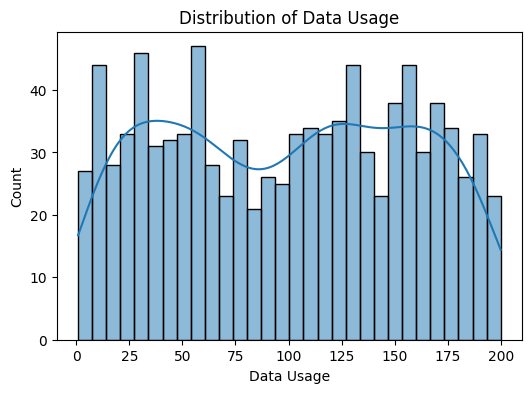

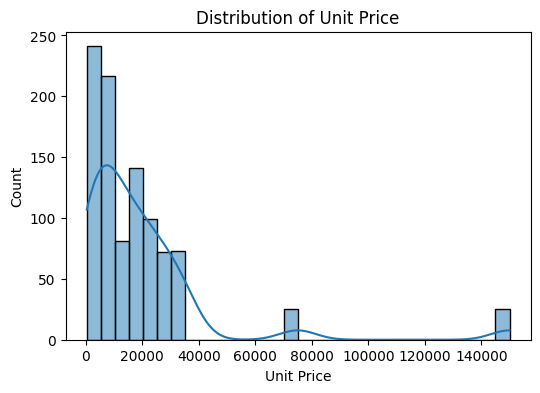

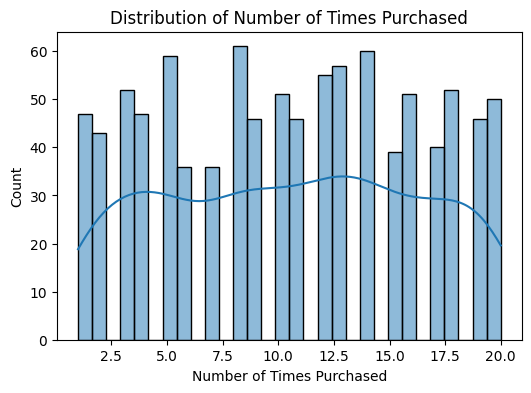

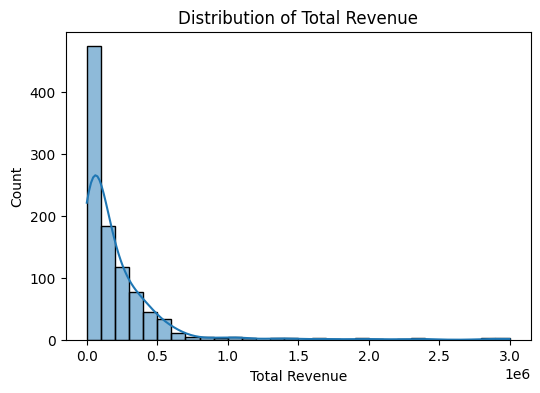

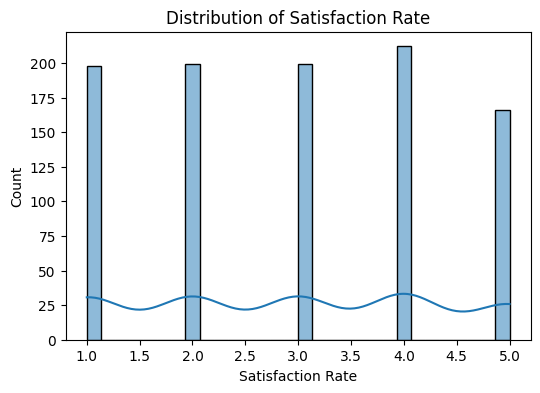

In [30]:
# numerical histograms (one by one)
device_level_num_cols = [
    'Data Usage',
    'Unit Price',
    'Number of Times Purchased',
    'Total Revenue',
    'Satisfaction Rate'
]

for col in device_level_num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(device_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

##### Categorical Features Analysis - Device-level (`device_df`)

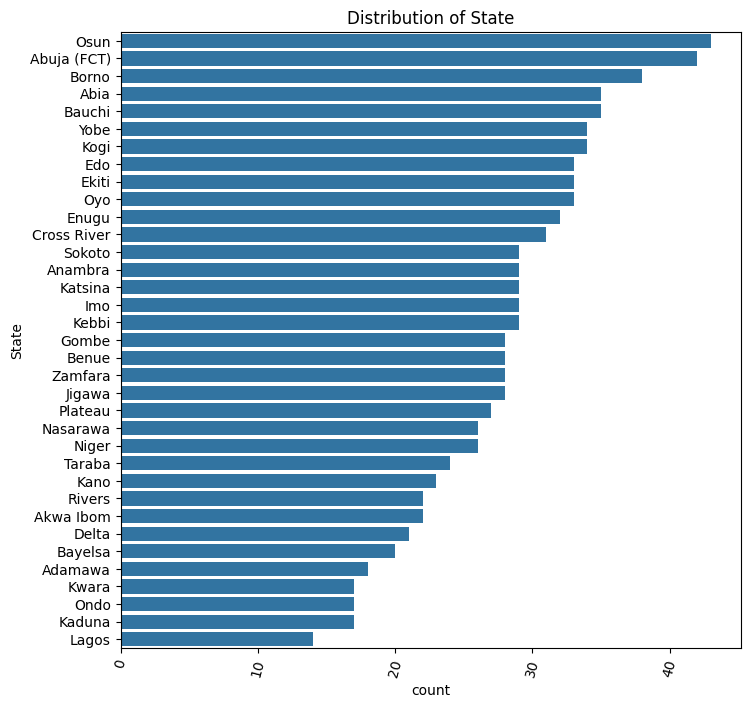

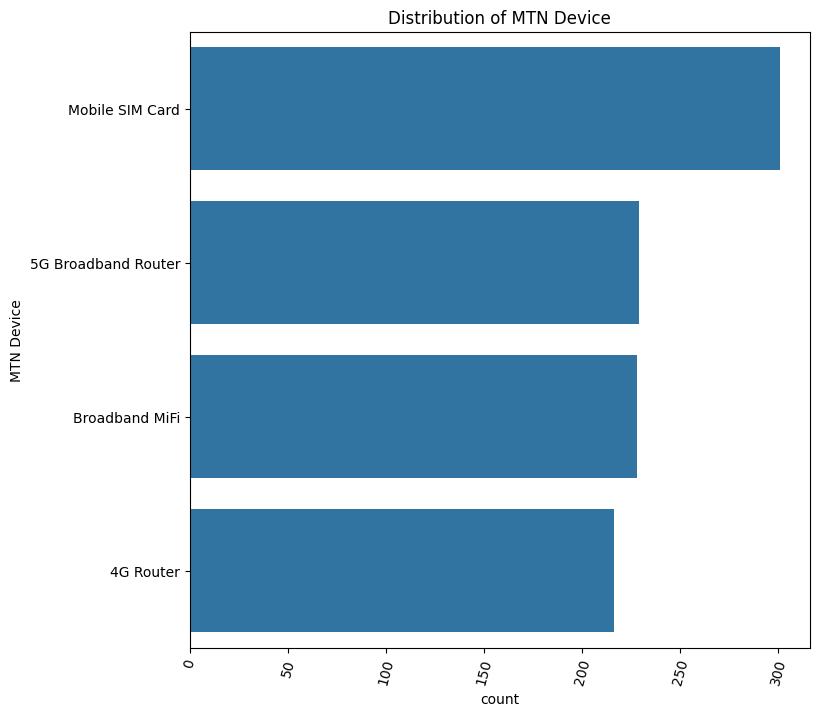

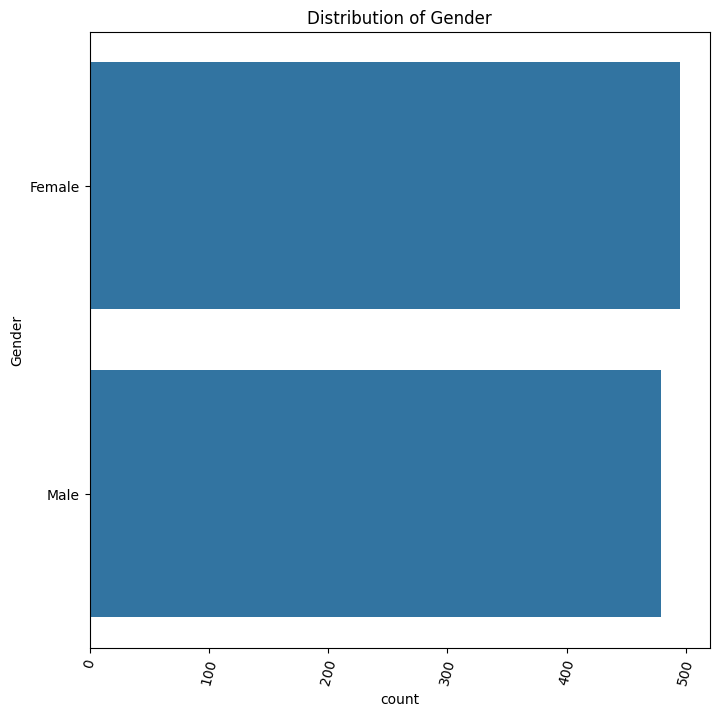

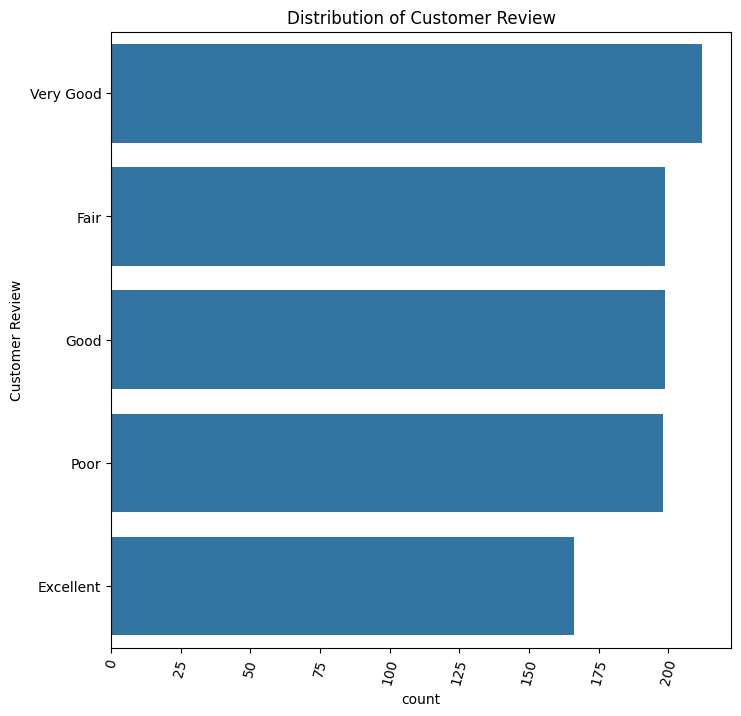

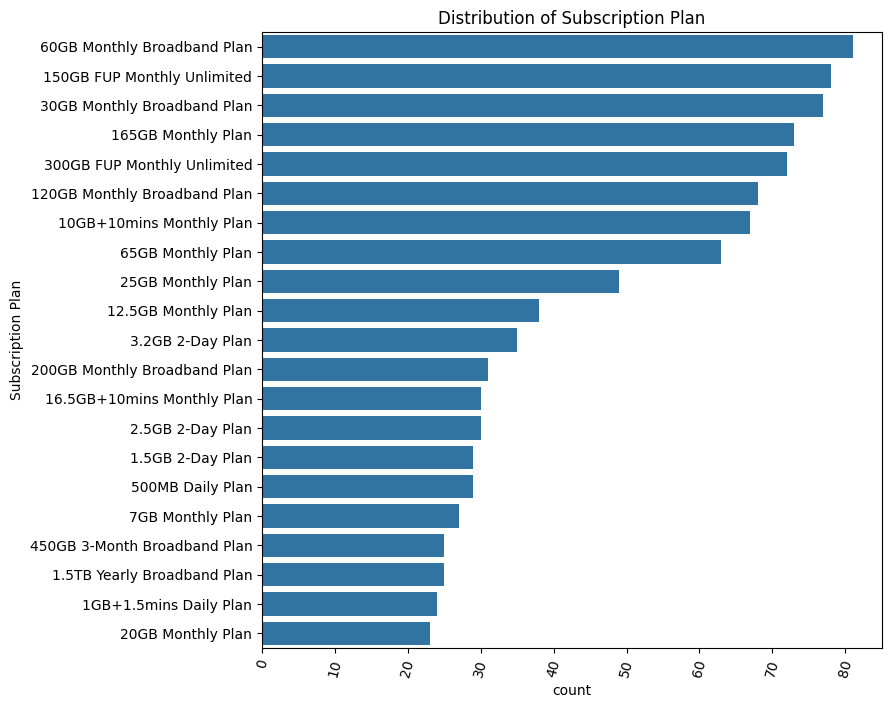

In [40]:
# categorical bar plots (counts)
device_level_cat_cols = [
    'State',
    'MTN Device',
    'Gender',
    'Customer Review',
    'Subscription Plan'
]

for col in device_level_cat_cols:
    plt.figure(figsize=(8,8))
    sns.countplot(y=col, data=device_df,
                  order=device_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=75)
    plt.show()

##### Numerical Features Analysis - Customer-level (`customer_df`)

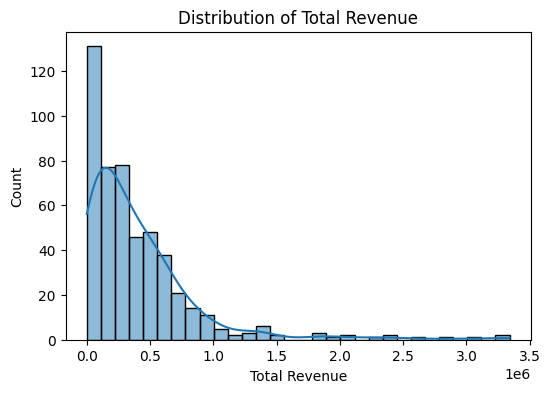

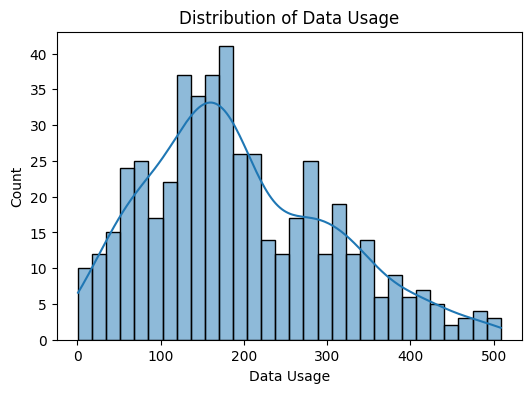

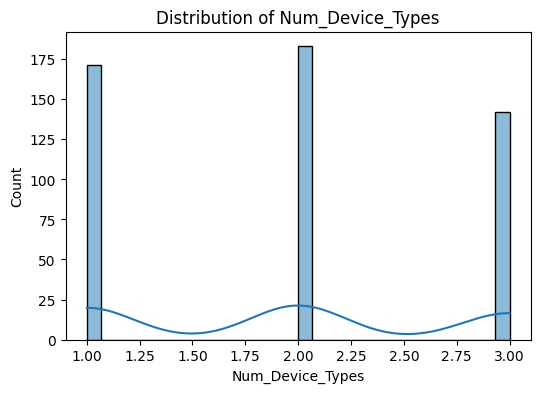

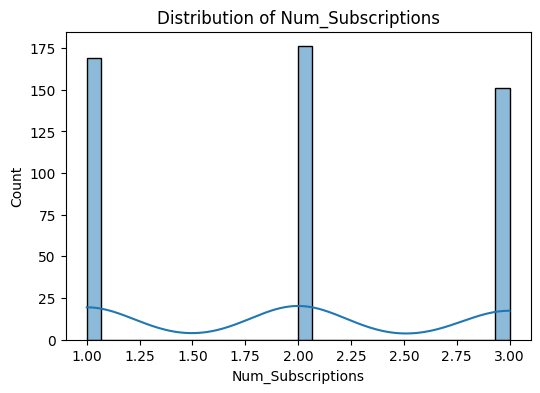

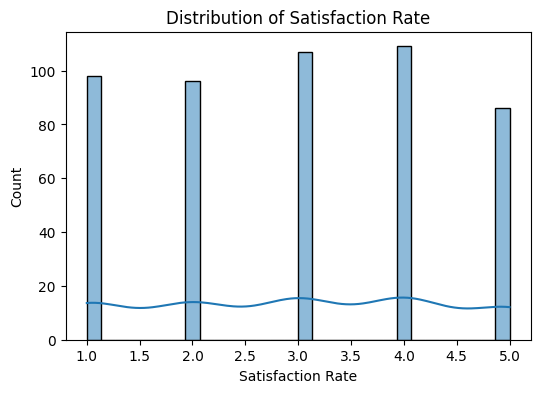

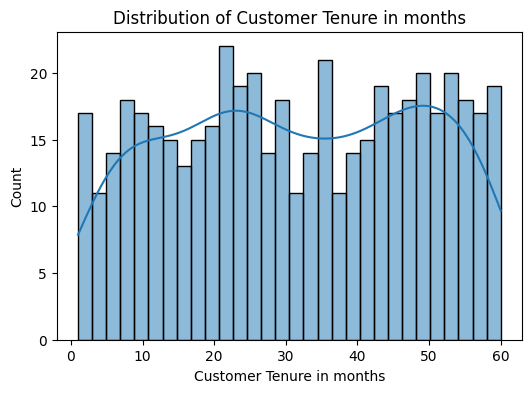

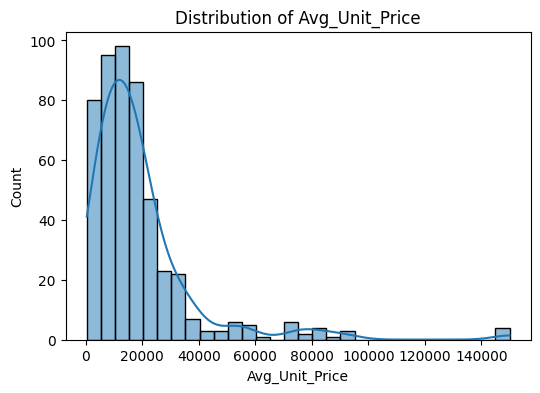

In [39]:
customer_level_num_cols = [
    'Total Revenue',
    'Data Usage',
    'Num_Device_Types',
    'Num_Subscriptions',
    'Satisfaction Rate',
    'Customer Tenure in months',
    'Avg_Unit_Price'
]

for col in customer_level_num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(customer_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

##### Categorical Features Analysis - Customer-level (`customer_df`)

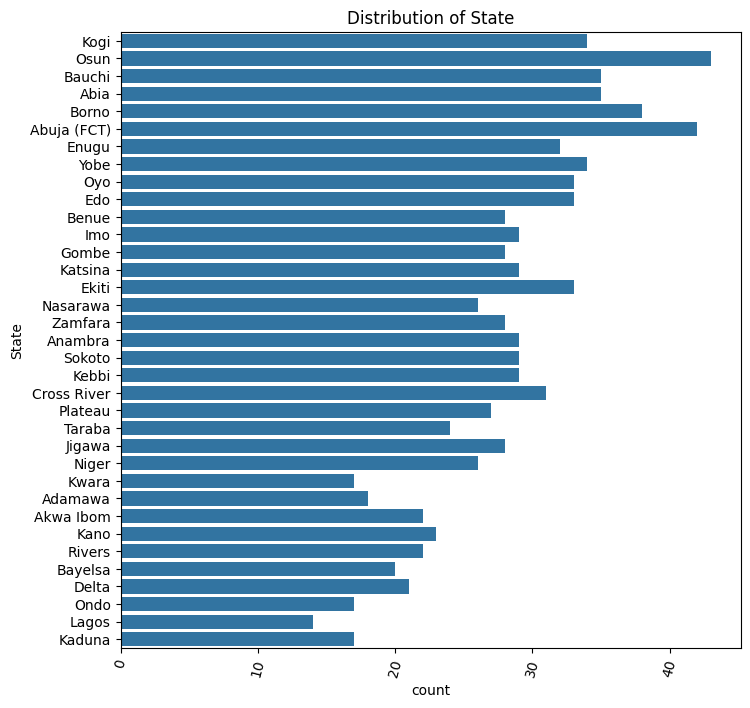

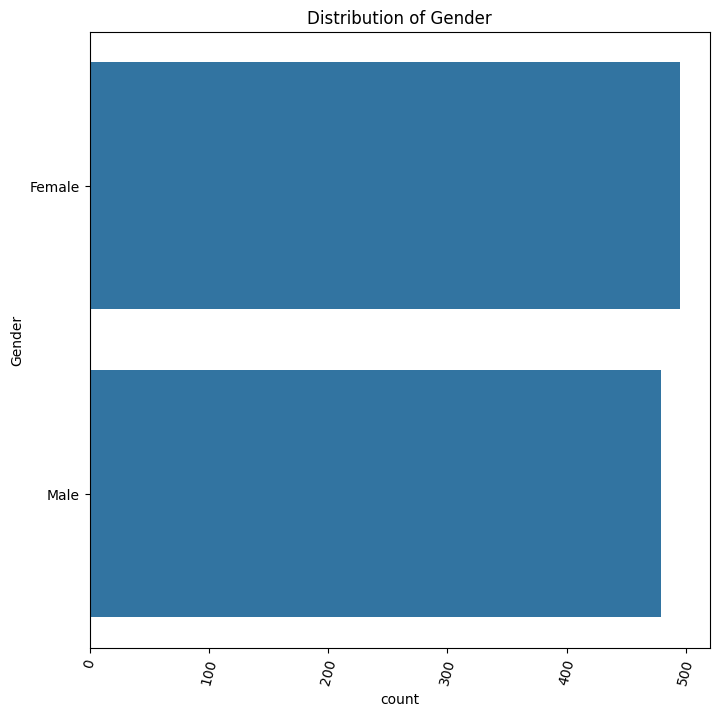

In [44]:
# categorical bar plots (counts)
customer_level_cat_cols = [
    'State',
    'Gender',
]

for col in customer_level_cat_cols:
    plt.figure(figsize=(8,8))
    sns.countplot(y=col, data=device_df,
                  order=customer_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=75)
    plt.show()

##### Target Variable Distribution (**`Customer Churn Status`**)

In [16]:
customer_churn_rate = (customer_df['Customer Churn Status']=='Yes').mean()

print("Customer churn rate:", customer_churn_rate)

Customer churn rate: 0.29435483870967744


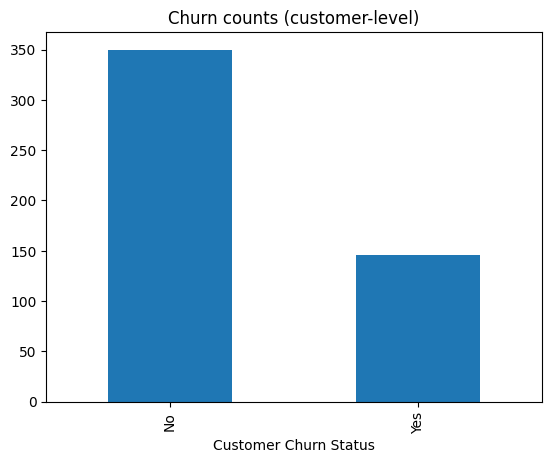

In [24]:
customer_df['Customer Churn Status'].value_counts().plot(kind='bar')
plt.title('Churn counts (customer-level)')
plt.show()

### Bivariate analysis (feature vs churn)

##### Numeric vs churn - Device-level (`device_df`)

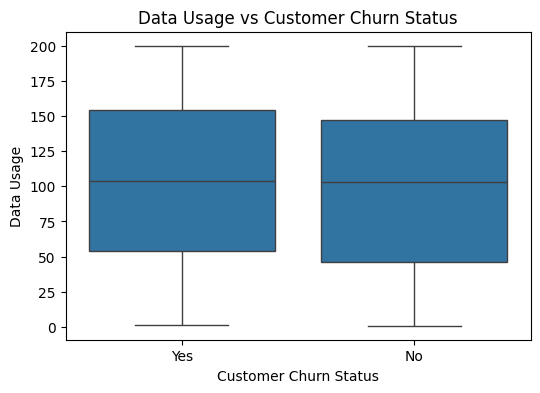

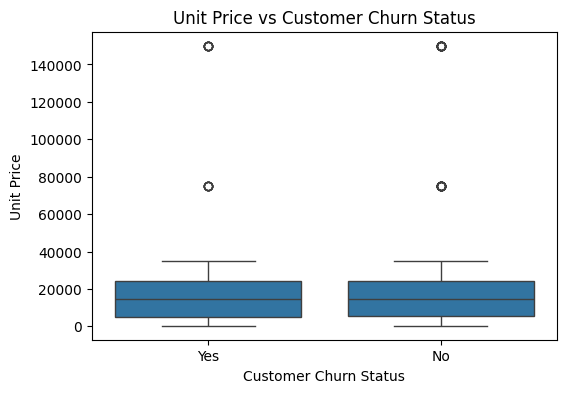

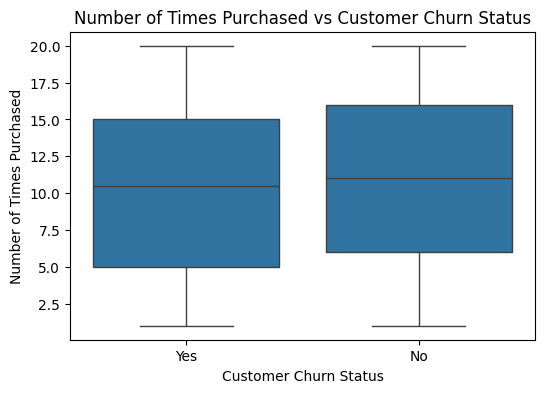

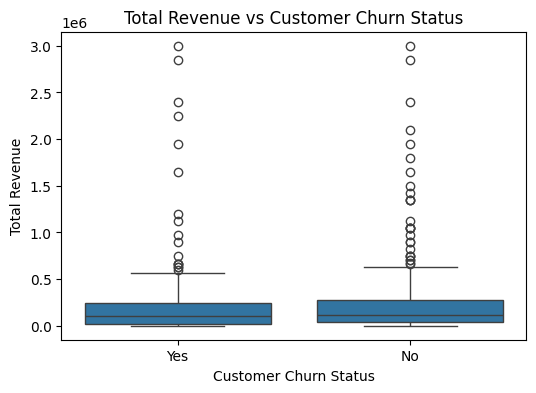

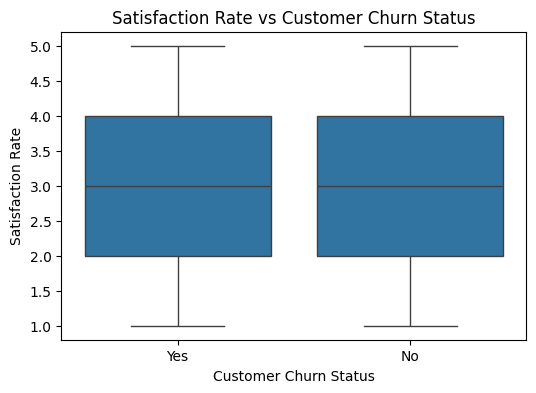

In [45]:
for col in device_level_num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Customer Churn Status", y=col, data=device_df)
    plt.title(f"{col} vs Customer Churn Status")
    plt.show()

##### Categorical vs churn - Device-level (`device_df`)

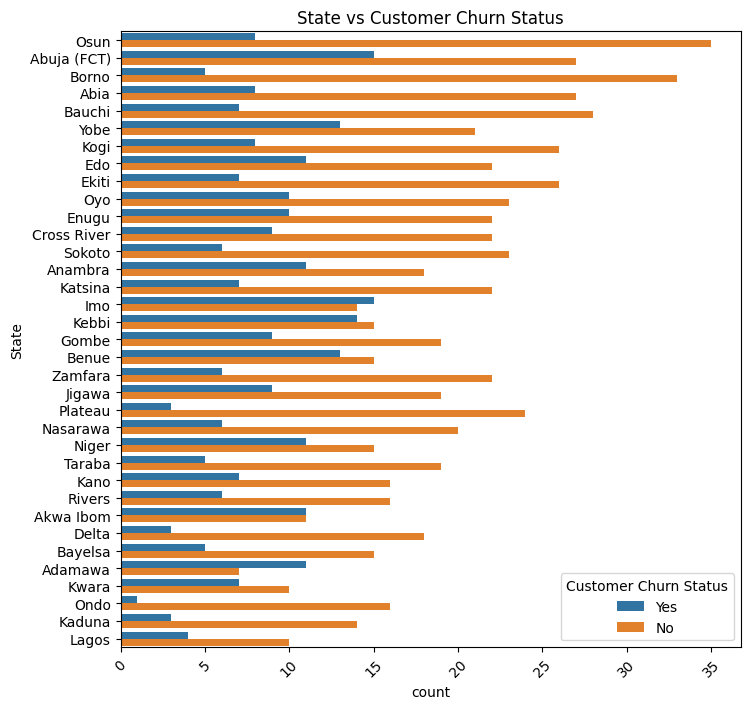

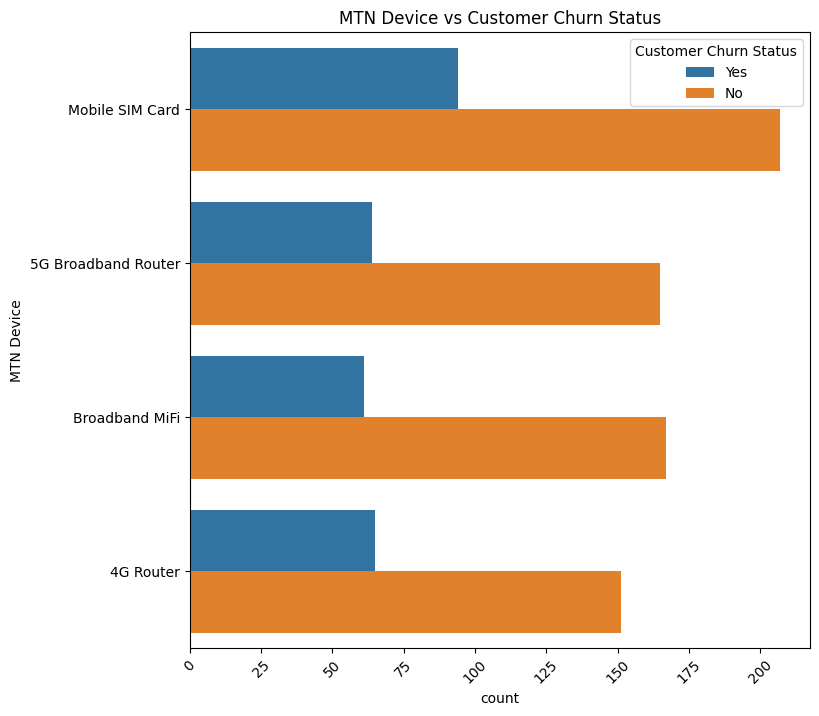

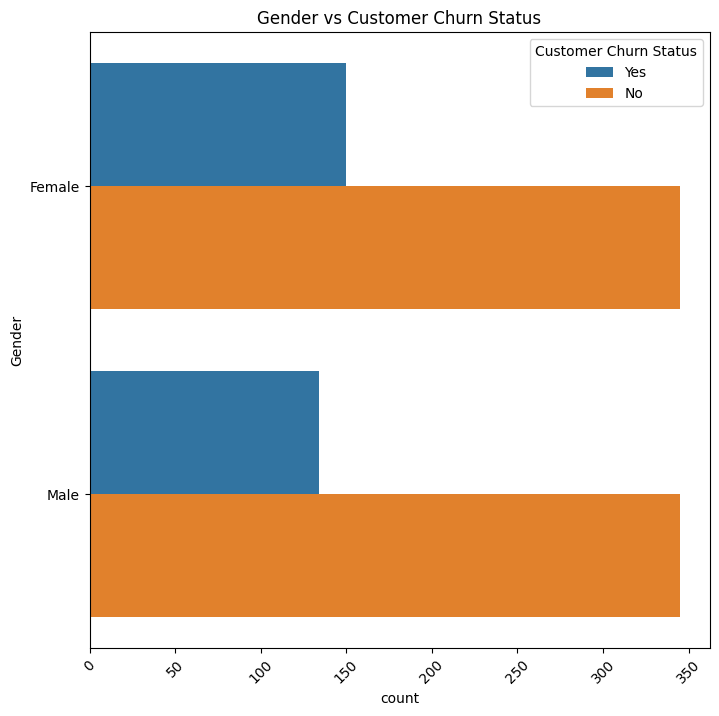

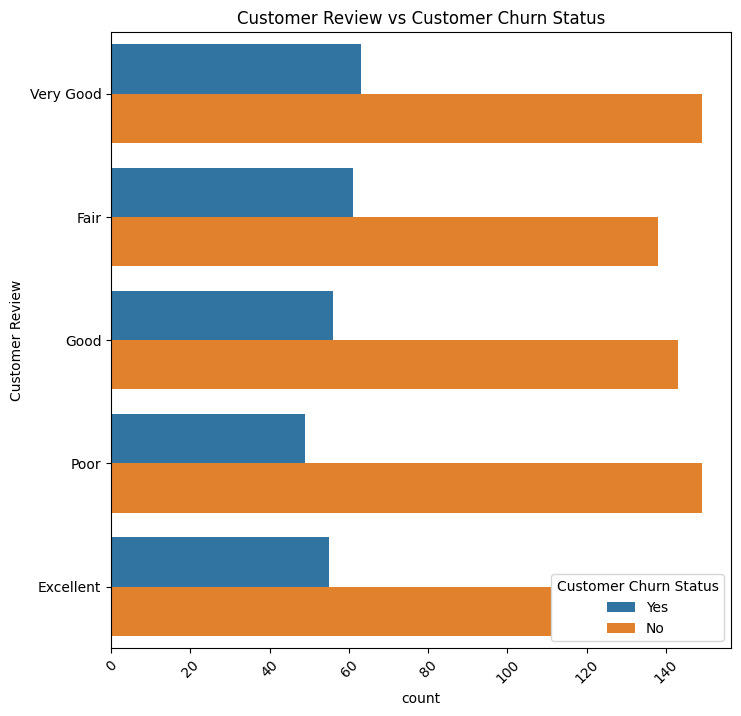

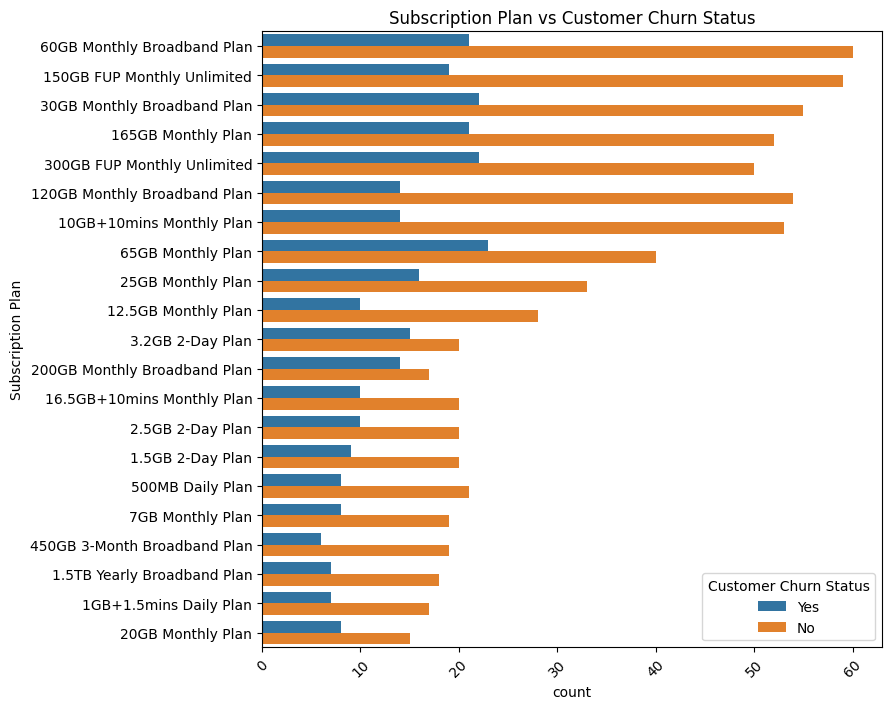

In [48]:
for col in device_level_cat_cols:
    plt.figure(figsize=(8,8))
    sns.countplot(y=col,
                  hue="Customer Churn Status",
                  data=device_df,
                  order=device_df[col].value_counts().index)
    plt.title(f"{col} vs Customer Churn Status")
    plt.xticks(rotation=45)
    plt.show()

##### Numeric vs churn - Customer-level (`customer_df`)

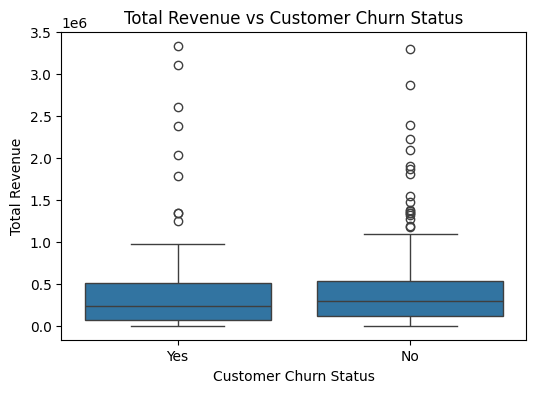

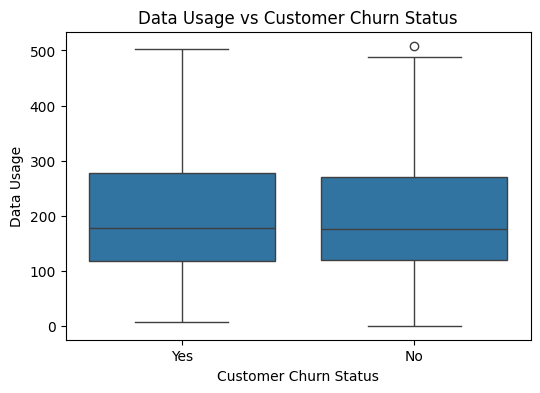

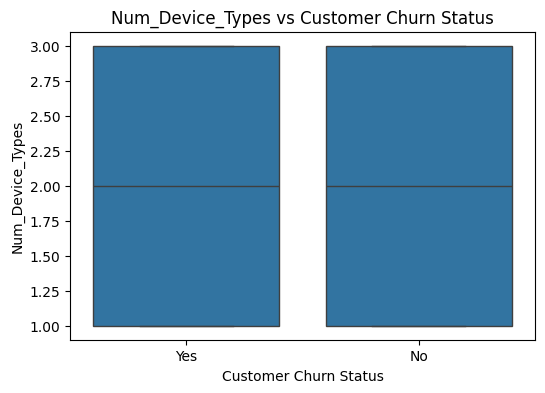

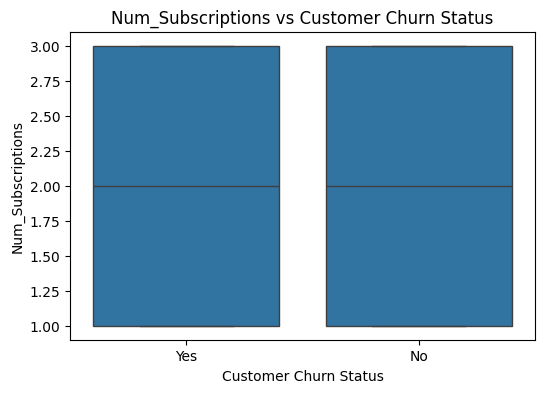

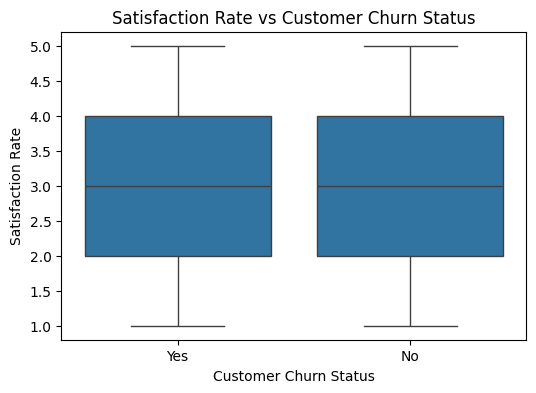

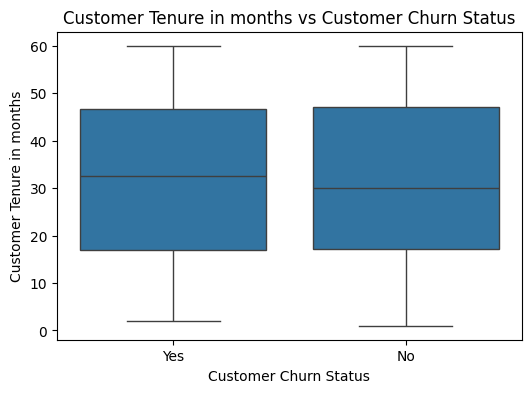

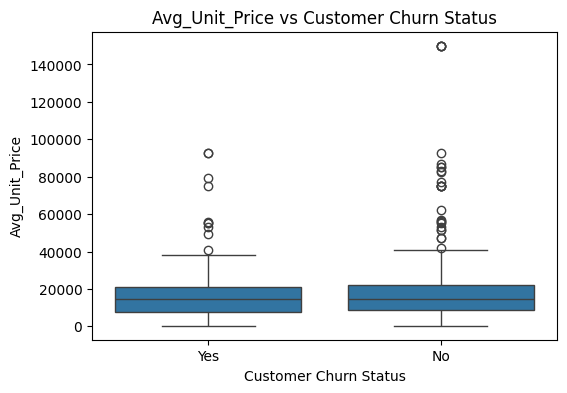

In [49]:
for col in customer_level_num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Customer Churn Status", y=col, data=customer_df)
    plt.title(f"{col} vs Customer Churn Status")
    plt.show()

##### Categorical vs churn - Customer-level (`customer_df`)

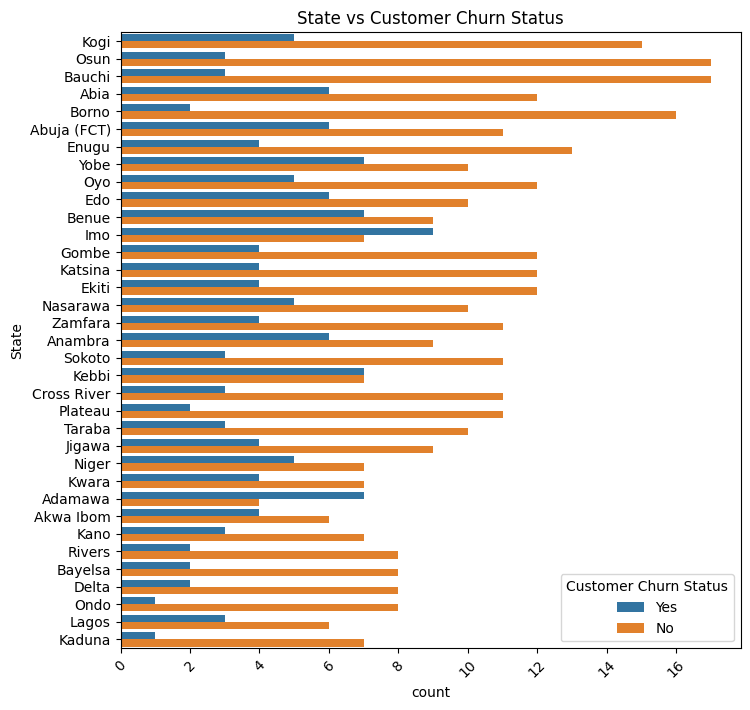

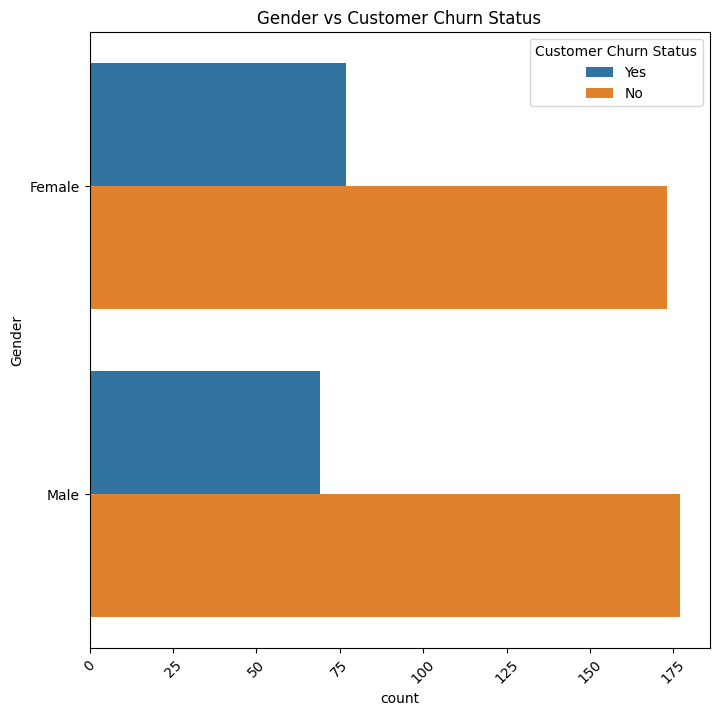

In [50]:
for col in customer_level_cat_cols:
    plt.figure(figsize=(8,8))
    sns.countplot(y=col,
                  hue="Customer Churn Status",
                  data=customer_df,
                  order=customer_df[col].value_counts().index)
    plt.title(f"{col} vs Customer Churn Status")
    plt.xticks(rotation=45)
    plt.show()

##### Correlation Analysis

##### State Insights

## Feature Engineering

Create following features:
- **Average Revenue per Subscription**: Distinguishes high-value vs. low-value customers.
- **Spending Category**: Useful for targeting high-value churners.
- **Is Multi Device**: Multi-device customers show higher engagement, affecting churn risk.
- **Customer Tenure Buckets**: Tenure has strong correlation with churn risk.
- **Plan Category (cheap vs premium)**: Pricing tier is often predictive.
- **Satisfaction Bucket**: Captures broad satisfaction trends without overfitting.

In [20]:
customer_df['Avg_Revenue_per_Subscription'] = (
    customer_df['Total Revenue'] /
    customer_df['Num_Subscriptions'].replace(0, np.nan)
)

customer_df['Spending_Category'] = pd.qcut(
    customer_df['Total Revenue'],
    q=[0, 0.25, 0.75, 0.95, 1.0],
    labels=['Low', 'Medium', 'High', 'Very High']
)


customer_df['Is_Multi_Device'] = (
    customer_df['Num_Device_Types'] > 1
    ).astype(int)

customer_df[['Total Revenue',
             'Avg_Revenue_per_Subscription',
             'Spending_Category',
             'Num_Device_Types',
             'Is_Multi_Device']].head()

,Total Revenue,Avg_Revenue_per_Subscription,Spending_Category,Num_Device_Types,Is_Multi_Device
0,665000,665000.000000,High,1,0
1,66000,66000.000000,Low,1,0
2,299000,99666.666667,Medium,3,1
3,40500,40500.000000,Low,1,0
4,144000,144000.000000,Medium,1,0


In [21]:
# Tenure buckets
def tenure_bucket(tenure):
    if tenure <= 6:
        return "0-6 months"
    elif tenure <= 24:
        return "6-24 months"
    elif tenure <= 60:
        return "24-60 months"
    else:
        return ">60 months"

customer_df['Tenure_Bucket'] = (
    customer_df['Customer Tenure in months'].apply(tenure_bucket)
)

# Plan category (cheap vs premium)
price_quantiles = customer_df['Avg_Unit_Price'].quantile([0.25, 0.75])
q25, q75 = price_quantiles[0.25], price_quantiles[0.75]

def plan_category(price):
    if price <= q25:
        return "Cheap"
    elif price >= q75:
        return "Premium"
    else:
        return "Standard"

customer_df['Plan_Category'] = (
    customer_df['Avg_Unit_Price'].apply(plan_category)
)

# Satisfaction buckets
def satisfaction_bucket(sat):
    if sat < 3:  # 0-2
        return "Low"
    elif sat == 3:
        return "Medium"
    else:
        return "High"

customer_df['Satisfaction_Bucket'] = (
    customer_df['Satisfaction Rate'].apply(satisfaction_bucket)
)

# View new columns
customer_df[['Customer Tenure in months', 'Tenure_Bucket',
             'Avg_Unit_Price', 'Plan_Category',
             'Satisfaction Rate', 'Satisfaction_Bucket']].head()

,Customer Tenure in months,Tenure_Bucket,Avg_Unit_Price,Plan_Category,Satisfaction Rate,Satisfaction_Bucket
0,2,0-6 months,35000.000000,Premium,2.0,Low
1,22,6-24 months,5500.000000,Cheap,2.0,Low
2,60,24-60 months,9833.333333,Standard,1.0,Low
3,14,6-24 months,4500.000000,Cheap,1.0,Low
4,53,24-60 months,9000.000000,Standard,3.0,Medium


Final dataframe after adding in all the new features.

In [22]:
customer_df.head()

,Customer ID,Full Name,Last_Purchase_Date,Age,Gender,State,Customer Tenure in months,Satisfaction Rate,Data Usage,Total Revenue,...,Num_Subscriptions,Avg_Unit_Price,Customer Churn Status,Reasons for Churn,Avg_Revenue_per_Subscription,Spending_Category,Is_Multi_Device,Tenure_Bucket,Plan_Category,Satisfaction_Bucket
0,CUST0001,Ngozi Berry,Jan-25,27,Male,Kwara,2,2.0,44.48,665000,...,1,35000.000000,Yes,Relocation,665000.000000,High,0,0-6 months,Premium,Low
1,CUST0002,Zainab Baker,Mar-25,16,Female,Abuja (FCT),22,2.0,19.79,66000,...,1,5500.000000,Yes,Better Offers from Competitors,66000.000000,Low,0,6-24 months,Cheap,Low
2,CUST0003,Saidu Evans,Mar-25,21,Male,Sokoto,60,1.0,283.03,299000,...,3,9833.333333,No,,99666.666667,Medium,1,24-60 months,Standard,Low
3,CUST0004,Ejiro Walker,Mar-25,36,Female,Gombe,14,1.0,92.72,40500,...,1,4500.000000,No,,40500.000000,Low,0,6-24 months,Cheap,Low
4,CUST0005,Nura Mann,Jan-25,57,Male,Oyo,53,3.0,42.92,144000,...,1,9000.000000,No,,144000.000000,Medium,0,24-60 months,Standard,Medium


In [23]:
customer_df.shape

(496, 21)

## Modeling

## Model Evaluation

## Conclusion

Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt.